## Ka-Ve Eğitimi Kabul Hackathonu V2 

In [44]:
#paketler
import pandas as pd
import numpy as np
import os
from numpy import *
data = pd.read_csv(r'C:/Users/Tuncay/Desktop/kave_hack_2/train2.csv')
data = data[['ID', 'calorie', 'water', 'carbohydrate', 'fiber', 'sugar', 'protein',
       'fat', 'sfat', 'cholesterol', 'sodium', 'potassium', 'calcium', 'vit_A',
       'vit_C', 'vit_D', 'vit_E', 'vit_K', 'vitB_altı', 'vitB_oniki',
       'thiamin', 'riboflavin', 'niacin', 'iron', 'pantotenik',
       'fosfor', 'magnesium', 'cinko', 'copper', 'selenium', 'manganese', 'folat',
       'Class']]
data.head()

,ID,calorie,water,carbohydrate,fiber,sugar,protein,fat,sfat,cholesterol,...,iron,pantotenik,fosfor,magnesium,cinko,copper,selenium,manganese,folat,Class
0,0,717,17.94,0.06,0,0.06,0.85,81.11,51.368,215,...,0.02,0.11,24,2,0.09,16,1,4,3,Hayvansal
1,1,116,76.78,0,0,0,19.41,3.71,94.900.000,89,...,0.76,1.1,174,20,02.05,66,21.8,14,4,Hayvansal
2,2,75,79.53,17.99,4.9,4.8,1.2,0.3,0.05,0,...,0.59,60.000.000,71,29,0.59,0.12,1.8,56.000.000,67,Bitkisel
3,3,132.46,73.13,12.46,1.59,1.59,6.37,6.57,2.23,22.57,...,0.98,0.39,79.5,21.38,1.36,0.15,5.2,0.24,15.53,Mix
4,4,103.29,79.04,04.01,01.07,2.38,11.47,4.53,0.77,28.62,...,0.71,0.4,78.47,16.49,0.46,0.05,8.5,0.1,15.6,Hayvansal


* Veriyi çektik ve veride neler olduğuna head() ile bir göz attık.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2500 non-null   int64  
 1   calorie       2500 non-null   object 
 2   water         2500 non-null   object 
 3   carbohydrate  2500 non-null   object 
 4   fiber         2500 non-null   object 
 5   sugar         2500 non-null   object 
 6   protein       2500 non-null   object 
 7   fat           2500 non-null   object 
 8   sfat          2500 non-null   object 
 9   cholesterol   2500 non-null   object 
 10  sodium        2500 non-null   float64
 11  potassium     2500 non-null   float64
 12  calcium       2500 non-null   float64
 13  vit_A         2500 non-null   float64
 14  vit_C         2500 non-null   object 
 15  vit_D         2500 non-null   float64
 16  vit_E         2500 non-null   object 
 17  vit_K         2500 non-null   object 
 18  vitB_altı     2500 non-null 

* Datamızı tanıyalım.Data 2500 satır ve 33 kolondan oluşmaktadır.Satırlar besinleri,satırlar ise onlara karşılık gelen besin değerlerini(su,vitanmin,kalsiyum,vb.)

* data.info() ile sütundaki değerlerin adetini ve type'nı bulduk.Ancak bunlar ne kadar anlamlı yada typelar doğrumu atanmış bakmamız gerek,ek olarak da missing data var mı? diye bir bakalım.

* Bunun için bir fonk ve tablo oluşturalım.

In [45]:
def Missing_type_data(df):

    import io
    import pandas as pd
    from itertools import groupby 
    
    
    import psutil, os, gc, time
   
    

    entry_lenght_list = []
    variable_name_list = []
    total_entry_list = []
    missing_value_number_list = []
    missing_value_ratio_list = []
    data_type_list = []
    unique_values_list = []
    number_of_unique_values_list = []

    for col in df.columns:

        buf = io.StringIO()
        df[[col]].info(buf=buf)
        data_info = buf.getvalue().split('\n') #converting to a string object done
        entry_lenght = int(data_info[1].split(' ')[1])
        
        a = [''.join(j).strip() for sub in data_info[5].split(' ')
        for k, j in groupby(sub, str.isdigit)]
        variable_name = a[1]
        total_entry = int(a[2])
        missing_value_number = entry_lenght - total_entry
        missing_value_ratio = round(float(missing_value_number/entry_lenght),4)
        
        data_type = a[4]

        number_of_unique_values = len(df[col].unique())
        unique_values = df[col].unique()

        entry_lenght_list.append(entry_lenght)
        variable_name_list.append(variable_name)
        total_entry_list.append(total_entry)
        missing_value_number_list.append(missing_value_number)
        missing_value_ratio_list.append(missing_value_ratio)
        data_type_list.append(data_type)
        unique_values_list.append(unique_values)
        number_of_unique_values_list.append(number_of_unique_values)

    data_info_df = pd.DataFrame({'Variable': variable_name_list, '#_Total_Entry':total_entry_list,\
                                 '#_Missing_Value': missing_value_number_list,'%_Missing_Value':missing_value_ratio_list,\
                                 'Data_Type': data_type_list, 'Unique_Values': unique_values_list,\
                                 '#_Unique_Values':number_of_unique_values_list})
    
    

    return data_info_df.sort_values(by='%_Missing_Value', ascending=False)





In [907]:
Missing_type_data(data)

,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values
0,ID,2500,0,0.0,int,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2500
17,vit_K,2500,0,0.0,object,"[7, 2.9, 22.5, 2.23, 4.11, 3.6, 0, 0.54, 47.6,...",687
31,folat,2500,0,0.0,object,"[3, 4, 67, 15.53, 15.6, 8, 0, 30, 98, 19.01, 9...",675
30,manganese,2500,0,0.0,object,"[4, 14, 56.000.000, 0.24, 0.1, 19, 55, 0, 2.49...",606
29,selenium,2500,0,0.0,object,"[1, 21.8, 1.8, 5.2, 8.5, 26.5, 0.5, 0.7, 34.4,...",791
28,copper,2500,0,0.0,object,"[16, 66, 0.12, 0.15, 0.05, 77, 6, 57, 2.47, 0....",495
27,cinko,2500,0,0.0,object,"[0.09, 02.05, 0.59, 1.36, 0.46, 2.78, 0.01, 0....",508
26,magnesium,2500,0,0.0,object,"[2, 20, 29, 21.38, 16.49, 21, 1, 14, 356, 8.85...",677
25,fosfor,2500,0,0.0,object,"[24, 174, 71, 79.5, 78.47, 149, 4, 22, 638, 57...",927
24,pantotenik,2500,0,0.0,object,"[0.11, 1.1, 60.000.000, 0.39, 0.4, 913, 0, 0.3...",680


* Tabloya baktığımızda;
    1. Data'da hiç missing data yok yani her besine karşılık gelen bir değer bulunmakta.
    2. Datadaki sutünların(değişkenlerin) birçoğunun typeları yanlış atanmış."Class" değişkeni hariç diğer değişkenler continuous değer almış olmalarına rağmen object olarak atanmış.Data'da sadece "Class" değişkeni kategorik.Bunuda tabloda "Unique_Values" sütunana bakarak görebiliriz.Değişkenlerin typelarını 'float' olarak değiştireceğiz.

In [46]:
data2 = data.copy()   #değişimlerden ilk verimizi koruyalım.Geri dönmesi kolay olsun

In [47]:

for i in data2.loc[:,"calorie":"manganese"]:  #burada "Class" değeri dışındakileri numerik olmalarını istiyorum
    data2[i] = pd.to_numeric(data2[i], errors='coerce') #numerik olmayanları zorla NA yaptı
#tekrar missing_type tablomuzu çizdirelim
    

In [34]:
 Missing_type_data(data2)


,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values
2,water,2173,327,0.1308,float,"[17.94, 76.78, 79.53, 73.13, 79.04, 66.44, 94....",1743
31,folat,2237,263,0.1052,float,"[3.0, 4.0, 67.0, 15.53, 15.6, 8.0, 0.0, 30.0, ...",674
3,carbohydrate,2390,110,0.0440,float,"[0.06, 0.0, 17.99, 12.46, 4.01, 0.04, 15.5, 25...",1513
28,copper,2404,96,0.0384,float,"[16.0, 66.0, 0.12, 0.15, 0.05, 77.0, 6.0, 57.0...",466
20,thiamin,2414,86,0.0344,float,"[5.0, 0.09, 0.1, 0.05, 59.0, 0.0, 803.0, 0.02,...",393
29,selenium,2422,78,0.0312,float,"[1.0, 21.8, 1.8, 5.2, 8.5, 26.5, 0.5, 0.7, 34....",775
27,cinko,2429,71,0.0284,float,"[0.09, 2.05, 0.59, 1.36, 0.46, 2.78, 0.01, 0.1...",499
24,pantotenik,2430,70,0.0280,float,"[0.11, 1.1, nan, 0.39, 0.4, 913.0, 0.0, 0.33, ...",639
21,riboflavin,2431,69,0.0276,float,"[34.0, 0.22, 0.05, 0.09, 0.07, 216.0, 0.0, 251...",462
18,vitB_altı,2432,68,0.0272,float,"[3.0, 381.0, 0.09, 0.21, 0.23, 0.0, 93.0, 802....",473


In [37]:
print(data2["water"].value_counts())
print(data2["folat"].value_counts())

0.00     58
0.20      6
58.58     5
93.00     5
3.00      5
         ..
79.41     1
92.59     1
44.47     1
71.70     1
45.00     1
Name: water, Length: 1742, dtype: int64
Mikrogram    263
0            237
5             87
3             55
7             55
            ... 
17.2           1
23.88          1
42.22          1
26.7           1
21.47          1
Name: folat, Length: 675, dtype: int64


* Burada "water"değişkeninde veri kaybı çok oldu.Halbuki "water"değişkeninde 1 adet string(gram) değer vardı.
    Data'ya tekrar göz attığımda 6 haneli değerler(995.400.000)gördüm.Bu değerleri int. olarak kabul etmiyor,
    bu değerleri kategorik olarak alıyor.Zorlama methodu ile bu değerleri kaybediyoruz.Bu ifadeleri döngüye sokarak,
    int. olabilecek hale getirmeliyiz.
* Yapacağımız dönüşüm de örneğin;995.400.000 değerini 995.400 mü?,  99.540 mı? ,  9.954 mi?   dönüştüremeliyiz?.Bunun için bu değerlere yakın değerleri karşılaştırarak karar vereceğim.

( "folat" değişkenini bu dögünün dışında tutacağım çünkü içerisinde 263 adet 'Mikrogram'.Bu fazla veri kaybına yol açacaktır.
    İlerde "float" değişkenini irdeleyerek dönüşüm yapabiliriz.)




In [48]:
data3 = data.copy()

In [909]:
a =data3.loc[(data3['fat'] <  "8.9")& (data3['fat'] > "8.1") |(data3['fat'] <  "89.8") & (data3['fat'] > "81.0")|
         (data3['fat'] <  "890.")& (data3['fat'] > "810.")]
a.loc[:,("calorie","fat")]

,calorie,fat
0,717,81.11
15,225.67,8.66
23,122.53,8.47
89,281,819.999.999
313,168.12,8.16
...,...,...
2393,109.98,8.67
2423,143,819.999.999
2458,164.18,8.83
2461,305,8.4


* "fat" değişkenini seçtim 8.16 ,81.11 ,811.999 gibi değerleri ekrana bastırdım ve bu değerleri diğer kolonlar ile karşılaştırdım.Örneğin "calorie" değişkenini ele alalım;
    * "fat"değeri 81.11 iken "calorie"değeri 717
    * "fat"değeri 8.16 iken "calorie"değeri 168.12
    * yanlış değerli "fat" 819.999.999 değeri için "calorie" değeri 164.18 ve 281 değerleri var.
* Buradan anlaşılacağı üzere 819.999.999 değeri 8.1999999 olmalı.Bu düzeltmeyi yapmalıyız.

In [49]:
big_numbers = {}
for i in data3.loc[:,"calorie":"manganese"]:
  for j in range(2500):
        if data3[i].dtypes == object:
            if  len(data3.loc[j,i])>6:
                big_numbers[j,i]=data3.loc[j,i].split('.')
                big_numbers[j,i] = ".".join((big_numbers[j,i][0],big_numbers[j,i][1]))
                data3.loc[j,i] = float("".join((big_numbers[j,i][0],big_numbers[j,i][1])))
                data3.loc[j,i] = (data3.loc[j,i])/10
                
            

In [916]:
data3.loc[a.index,("calorie","fat")]
    


,calorie,fat
0,717,81.11
15,225.67,8.66
23,122.53,8.47
89,281,0.81
313,168.12,8.16
...,...,...
2393,109.98,8.67
2423,143,0.81
2458,164.18,8.83
2461,305,8.4


* Görüldüğü üzere verideki 9 haneli numerik olmayan ama sayı içeren ifadeler dönüştürüldü.(ID:89 bakabilirsiniz)
* Artık variable type değiştirdiğimizde NAN ifadeler olmayacak.

In [50]:
#değişimlerden ilk verimizi koruyalım.Geri dönmesi kolay olsun
for i in data3.loc[:,"calorie":"manganese"]:  #burada "Class" değeri dışındakileri numerik olmalarını istiyorum
    data3[i] = pd.to_numeric(data3[i], errors='coerce') #numerik olmayanları zorla NA yaptı
#tekrar missing_type tablomuzu çizdirelim


In [920]:
Missing_type_data(data3)

,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values
2,water,2499,1,0.0004,float,"[17.94, 76.78, 79.53, 73.13, 79.04, 66.44, 94....",1766
0,ID,2500,0,0.0000,int,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2500
25,fosfor,2500,0,0.0000,float,"[24.0, 174.0, 71.0, 79.5, 78.47, 149.0, 4.0, 2...",926
19,vitB_oniki,2500,0,0.0000,float,"[0.17, 0.51, 0.0, 0.44, 0.09, 0.23, 0.34, 1.31...",335
20,thiamin,2500,0,0.0000,float,"[5.0, 0.09, 0.1, 0.05, 59.0, 0.0, 803.0, 0.02,...",399
21,riboflavin,2500,0,0.0000,float,"[34.0, 0.22, 0.05, 0.09, 0.07, 216.0, 0.0, 251...",466
22,niacin,2500,0,0.0000,float,"[42.0, 5.1979999999999995, 0.7, 1.71, 0.0, 4.7...",1208
23,iron,2500,0,0.0000,float,"[0.02, 0.76, 0.59, 0.98, 0.71, 1.4, 0.03, 0.8,...",536
24,pantotenik,2500,0,0.0000,float,"[0.11, 1.1, 6.0, 0.39, 0.4, 913.0, 0.0, 0.33, ...",653
26,magnesium,2500,0,0.0000,float,"[2.0, 20.0, 29.0, 21.38, 16.49, 21.0, 1.0, 14....",675


* Evet bunu başardık.Ancak 1 adet "water"değişkeninde var.Onuda veriyi incelediğimizde,veriye string olarak 'gram'ifadesi var.Bu değere "water"değişkeniniz ortalamasını atayacağım.

In [51]:
data3.loc[77,"water"] =data3["water"].mean()


In [729]:
Missing_type_data(data3)

,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values
0,ID,2500,0,0.0,int,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2500
17,vit_K,2500,0,0.0,float,"[7.0, 2.9, 22.5, 2.23, 4.11, 3.6, 0.0, 0.54, 4...",677
31,folat,2500,0,0.0,object,"[3, 4, 67, 15.53, 15.6, 8, 0, 30, 98, 19.01, 9...",675
30,manganese,2500,0,0.0,float,"[4.0, 14.0, 0.56, 0.24, 0.1, 19.0, 55.0, 0.0, ...",580
29,selenium,2500,0,0.0,float,"[1.0, 21.8, 1.8, 5.2, 8.5, 26.5, 0.5, 0.7, 34....",782
28,copper,2500,0,0.0,float,"[16.0, 66.0, 0.12, 0.15, 0.05, 77.0, 6.0, 57.0...",472
27,cinko,2500,0,0.0,float,"[0.09, 2.05, 0.59, 1.36, 0.46, 2.78, 0.01, 0.1...",499
26,magnesium,2500,0,0.0,float,"[2.0, 20.0, 29.0, 21.38, 16.49, 21.0, 1.0, 14....",676
25,fosfor,2500,0,0.0,float,"[24.0, 174.0, 71.0, 79.5, 78.47, 149.0, 4.0, 2...",927
24,pantotenik,2500,0,0.0,float,"[0.11, 1.1, 0.6, 0.39, 0.4, 913.0, 0.0, 0.33, ...",640


* Verimizdeki typeları veri kaybetmeden düzenledik.(** Aynı işlemleri test datasınada uygulayacağız.)


In [52]:
#"folat" değişkenindeki 'miligram' değerlerine,değişkenin ortalmasını atadık.
data3.folat = pd.to_numeric(data3.folat, errors='coerce') 
print('"folat" değişkeninin ort:',data3["folat"].mean())
Nanlar = isnan(data3.folat)
data3.folat[Nanlar] = data3["folat"].mean()


"folat" değişkeninin ort: 40.314157353598546


C:\Users\Tuncay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [923]:
Missing_type_data(data3)

,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values
0,ID,2500,0,0.0,int,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2500
17,vit_K,2500,0,0.0,float,"[7.0, 2.9, 22.5, 2.23, 4.11, 3.6, 0.0, 0.54, 4...",680
31,folat,2500,0,0.0,float,"[3.0, 4.0, 67.0, 15.53, 15.6, 8.0, 0.0, 30.0, ...",674
30,manganese,2500,0,0.0,float,"[4.0, 14.0, 5.6, 0.24, 0.1, 19.0, 55.0, 0.0, 2...",589
29,selenium,2500,0,0.0,float,"[1.0, 21.8, 1.8, 5.2, 8.5, 26.5, 0.5, 0.7, 34....",778
28,copper,2500,0,0.0,float,"[16.0, 66.0, 0.12, 0.15, 0.05, 77.0, 6.0, 57.0...",476
27,cinko,2500,0,0.0,float,"[0.09, 2.05, 0.59, 1.36, 0.46, 2.78, 0.01, 0.1...",503
26,magnesium,2500,0,0.0,float,"[2.0, 20.0, 29.0, 21.38, 16.49, 21.0, 1.0, 14....",675
25,fosfor,2500,0,0.0,float,"[24.0, 174.0, 71.0, 79.5, 78.47, 149.0, 4.0, 2...",926
24,pantotenik,2500,0,0.0,float,"[0.11, 1.1, 6.0, 0.39, 0.4, 913.0, 0.0, 0.33, ...",653


#### OUTLİER 
* Outlier verileri bulmak için bir çok yönetem var.Ben verinin grafiklerini çizdireceğim eğer normal dağılıyorsa Z-score hesaplayarak bulacağım, normal dağılmıyor ise IQR hesaplayarak temizliyeceğim.

* Değişkenlerimin grafiklerini çizelim.


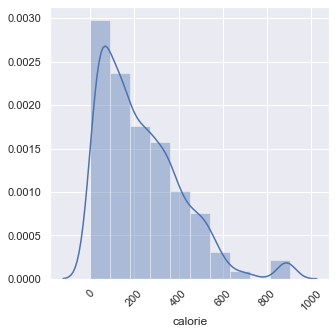

C:\Users\Tuncay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Tuncay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Tuncay\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Users\Tuncay\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.


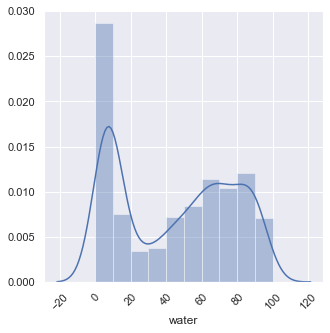

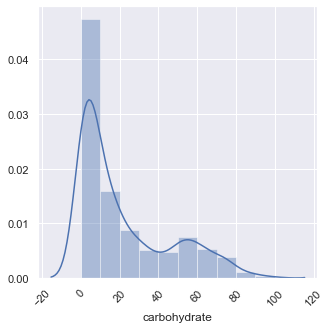

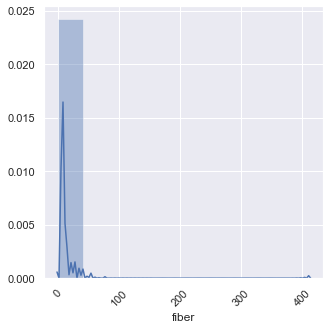

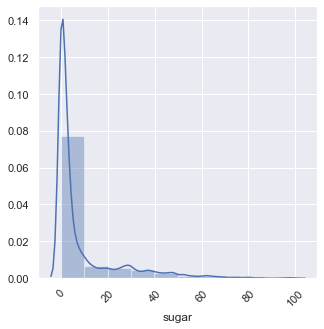

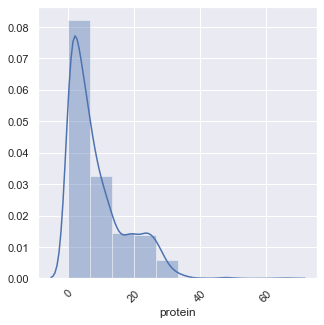

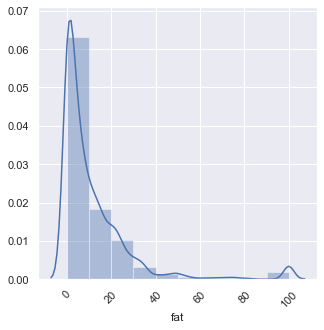

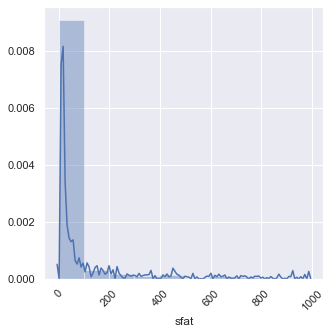

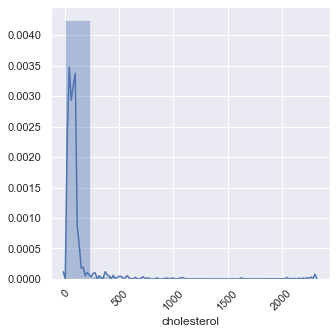

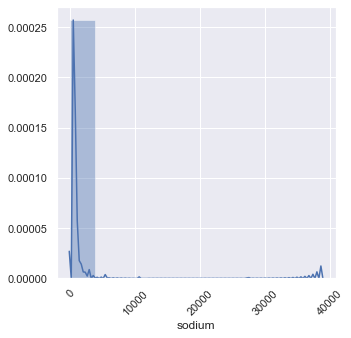

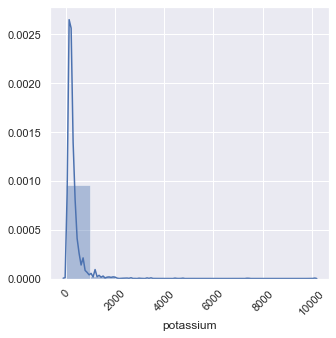

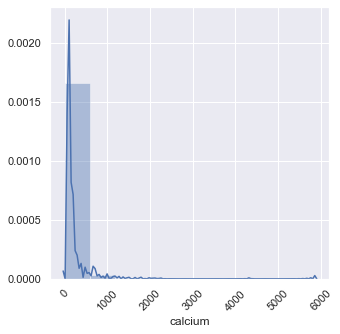

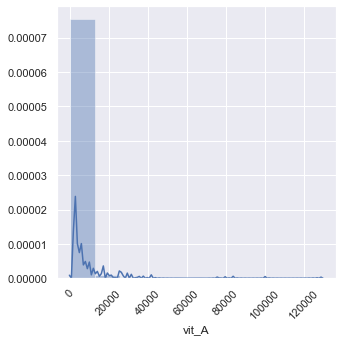

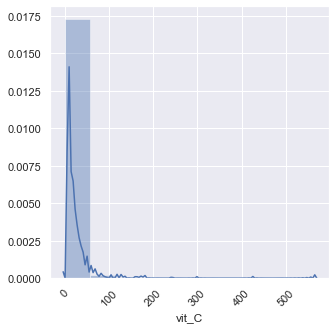

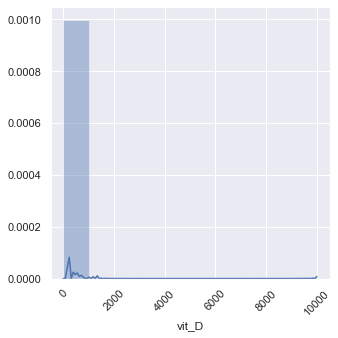

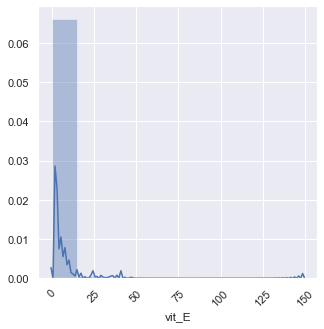

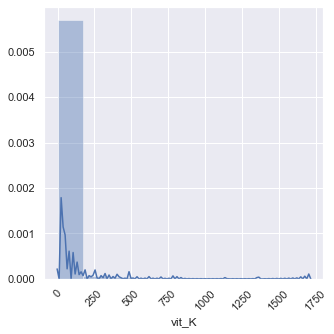

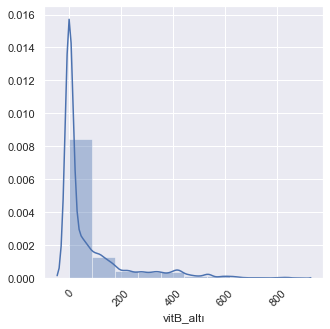

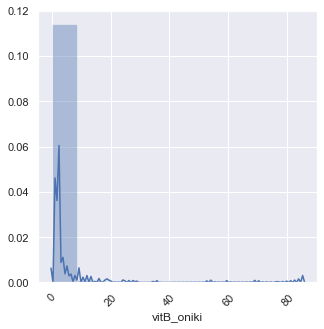

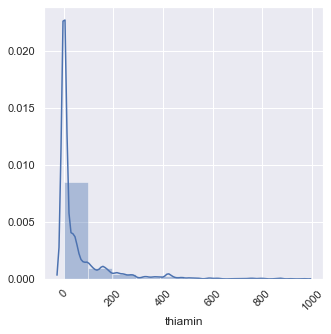

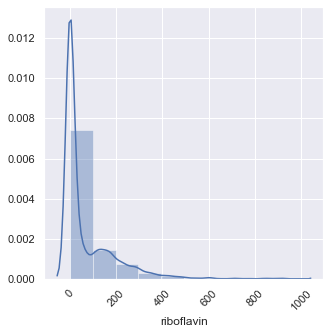

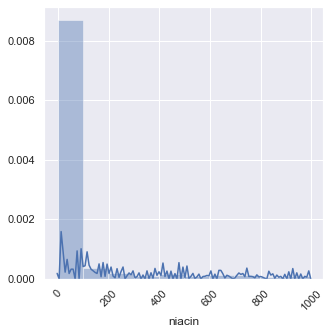

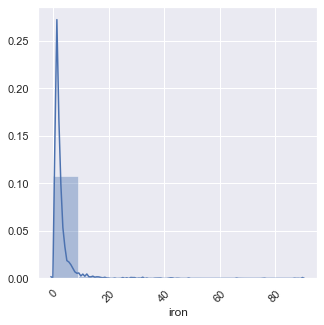

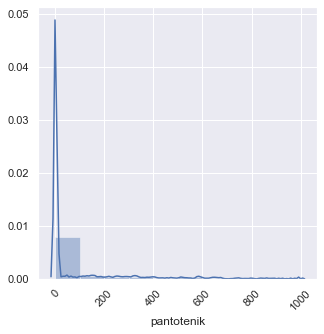

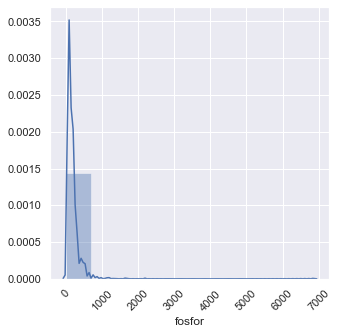

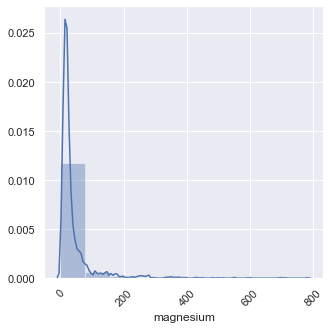

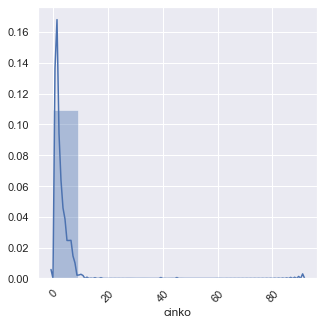

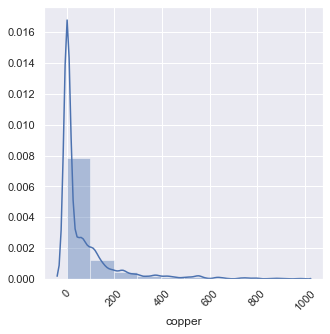

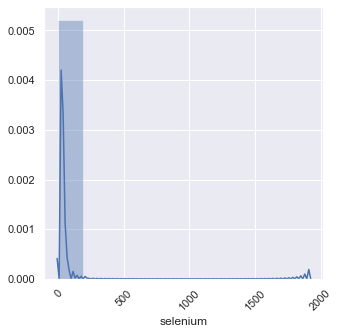

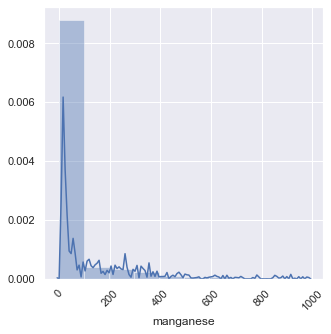

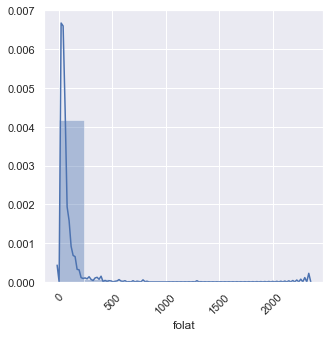

In [714]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizations

sns.set( rc = {'figure.figsize': (5, 5)})
fnum = ['calorie', 'water', 'carbohydrate', 'fiber', 'sugar', 'protein',
       'fat', 'sfat', 'cholesterol', 'sodium', 'potassium', 'calcium', 'vit_A',
       'vit_C', 'vit_D', 'vit_E', 'vit_K', 'vitB_altı', 'vitB_oniki',
       'thiamin', 'riboflavin', 'niacin', 'iron', 'pantotenik', 'fosfor',
       'magnesium', 'cinko', 'copper', 'selenium', 'manganese','folat']
num =data3.loc[:,"calorie":"folat"]
num
for col in fnum:
    plt.figure()
    x=num[col]
    sns.distplot(x, bins=10)
    plt.xticks(rotation=45)
    plt.show()
    print(" ")


* Grafiklere baktığımda normal dağılım göstermemekte çoğu değişken.Tranformasyon yapıp Z-score hesaplayabilirim ama ben IQR hesabı kullanacağım.
* Bir değişken için Box-plot çizdirelim.

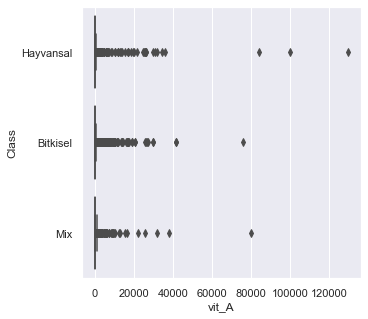

In [296]:
ax = sns.boxplot(x="vit_A", y="Class", data=data3)


* "fat" değişkeni için kutu grafiğinde de görüldüğü gibi verimizde outlier'lar mevcut.
* Değişkenler için IQR hesaplayalım

In [7]:
iqr_dic={}
for i in data3.loc[:,"calorie":"folat"]:
  q1 = data3[i].describe().loc["25%"]
  q3 = data3[i].describe().loc["75%"]
  iqr = q3 - q1
  iqr_dic[i]=(iqr,)
  lower_bound = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr) 
  
  iqr_dic[i]=(iqr,lower_bound, upper_bound)
  

* 1,5*iqr dilimi dışındakileri outlier kabul ettim.
* lower_bound, upper_bound dışınlarkileri lower_bound veya upper_bound eşitlemeyeceğim ancak çok yakın bir değere atayacağım.

In [941]:
iqr_dic

{'calorie': (257.0, -303.5, 467.5),
 'water': (64.5725, -87.65875000000001, 106.05875),
 'carbohydrate': (31.22, -43.05, 50.61),
 'fiber': (2.9, -4.35, 4.35),
 'sugar': (8.4, -12.600000000000001, 12.600000000000001),
 'protein': (10.58, -13.770000000000001, 17.97),
 'fat': (14.4325, -20.67875, 22.61875),
 'sfat': (12.97, -18.425, 20.485),
 'cholesterol': (39.07, -58.605000000000004, 58.605000000000004),
 'sodium': (306.21, -451.31499999999994, 467.31499999999994),
 'potassium': (203.02999999999997, -207.54499999999996, 401.54499999999996),
 'calcium': (66.0025, -88.00375, 110.00375),
 'vit_A': (352.695, -529.0425, 529.0425),
 'vit_C': (6.422500000000001, -9.633750000000003, 9.633750000000003),
 'vit_D': (2.8525, -4.2787500000000005, 4.2787500000000005),
 'vit_E': (0.91, -1.365, 1.365),
 'vit_K': (5.5, -8.25, 8.25),
 'vitB_altı': (92.92, -139.29999999999998, 139.46),
 'vitB_oniki': (0.39, -0.585, 0.585),
 'thiamin': (55.96, -83.89999999999999, 83.98),
 'riboflavin': (111.94, -167.85, 16

* Tüm değişkenler için lower_bound değerleri negatif değerler.Verimizde 0'dan daha küçük değer yok.Bu da demek oluyor ki büyük değerlerde değişikliğe gideceğiz.
* "folat" değişkenindeki 'miligram' değerlerine ortalam(40.3) atamıştık.Atadığımız değerler outlier olmamış.
* Bunun için bir döngü yazacağım ve upper_bound'ın %2,5 artırarak outlier değerlerin değiştireceğim.


In [435]:
data4 =data3.copy()

In [8]:

outlier_dic={} #değişkenlerin içerisinde kaç outlier temizlendiyi saymak için
for col in data7.loc[:,"calorie":"folat"]:
    say =0
    for i in range(len(data3.index)):
        if data3.loc[i,col]> iqr_dic[col][2]:
            say=say+1
            data3.loc[i,col] = data3.loc[i,col]+iqr_dic[col][2]*(2.5)/100
    outlier_dic[col]=say
            
            



In [437]:
outlier_dic

{'calorie': 285,
 'water': 0,
 'carbohydrate': 442,
 'fiber': 391,
 'sugar': 515,
 'protein': 427,
 'fat': 357,
 'sfat': 498,
 'cholesterol': 488,
 'sodium': 388,
 'potassium': 368,
 'calcium': 455,
 'vit_A': 519,
 'vit_C': 493,
 'vit_D': 525,
 'vit_E': 422,
 'vit_K': 483,
 'vitB_altı': 449,
 'vitB_oniki': 530,
 'thiamin': 498,
 'riboflavin': 413,
 'niacin': 486,
 'iron': 374,
 'pantotenik': 595,
 'fosfor': 304,
 'magnesium': 444,
 'cinko': 442,
 'copper': 428,
 'selenium': 340,
 'manganese': 532,
 'folat': 411}

* En çok outlier veri barındıran değişken "pantotenik" iken
"water" değişkeni hiç outlier olmadığını görürüz.

In [438]:
data3.describe()

,ID,calorie,water,carbohydrate,fiber,sugar,protein,fat,sfat,cholesterol,...,niacin,iron,pantotenik,fosfor,magnesium,cinko,copper,selenium,manganese,folat
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1249.50000,217.803907,44.980656,19.522011,1.698496,4.375246,7.705276,8.737366,7.468315,17.836332,...,3.584018,1.273474,14.394078,106.360120,20.581059,1.005921,39.893045,8.008934,6.563881,25.695904
std,721.83216,151.749361,32.306187,19.114299,1.621736,5.009196,6.408406,8.368839,7.965421,24.430277,...,3.784836,1.096037,23.542395,90.807652,14.925317,0.991323,51.192910,8.879804,9.549051,20.570851
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,624.75000,82.000000,9.200000,3.780000,0.000000,0.000000,2.100000,0.970000,1.030000,0.000000,...,0.090000,0.290000,0.000000,24.000000,9.727500,0.170000,0.060000,0.300000,0.000000,7.000000
50%,1249.50000,190.115000,49.385000,11.340000,1.330000,2.090000,5.875000,5.795000,3.614500,0.000000,...,1.968500,1.030000,0.340000,87.065000,18.970000,0.590000,1.277000,3.525000,0.280000,21.000000
75%,1874.25000,339.000000,73.772500,35.000000,2.900000,8.400000,12.680000,15.402500,14.000000,39.070000,...,6.475000,2.132500,36.000000,181.000000,32.000000,1.810000,83.000000,15.600000,15.000000,40.314157
max,2499.00000,479.187500,99.840000,51.875250,4.458750,12.915000,18.419250,23.184219,20.997125,60.070125,...,9.909187,3.130094,55.350000,265.987500,44.214656,2.695750,127.581750,23.831250,23.062500,58.395517


In [439]:
data4.describe()

,ID,calorie,water,carbohydrate,fiber,sugar,protein,fat,sfat,cholesterol,...,niacin,iron,pantotenik,fosfor,magnesium,cinko,copper,selenium,manganese,folat
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1249.50000,231.780940,44.980656,21.793446,2.896568,8.777748,8.749512,11.708412,46.051271,33.108464,...,62.676514,2.103536,91.264778,130.021252,34.935604,1.496388,69.194650,11.074352,48.648115,40.314157
std,721.83216,184.776495,32.306187,23.584125,9.765877,15.227371,8.586647,17.406572,137.079198,103.081705,...,176.290943,4.999217,198.158707,207.185018,64.531910,3.341355,132.531908,41.527441,132.884366,85.871366
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,624.75000,82.000000,9.200000,3.780000,0.000000,0.000000,2.100000,0.970000,1.030000,0.000000,...,0.090000,0.290000,0.000000,24.000000,9.727500,0.170000,0.060000,0.300000,0.000000,7.000000
50%,1249.50000,190.115000,49.385000,11.340000,1.330000,2.090000,5.875000,5.795000,3.614500,0.000000,...,1.968500,1.030000,0.340000,87.065000,18.970000,0.590000,1.277000,3.525000,0.280000,21.000000
75%,1874.25000,339.000000,73.772500,35.000000,2.900000,8.400000,12.680000,15.402500,14.000000,39.070000,...,6.475000,2.132500,36.000000,181.000000,32.000000,1.810000,83.000000,15.600000,15.000000,40.314157
max,2499.00000,902.000000,99.840000,100.000000,412.000000,99.800000,66.670000,100.000000,989.000000,2307.000000,...,995.000000,89.800000,999.000000,6869.000000,781.000000,90.950000,984.000000,1917.000000,987.000000,2340.000000


* Data outlier atmadan önceki verimi data4 olarak atadım.Outlier attıktan sonra karşılaştırma yapabileyim diye.
* Görüldüğü üzere max'değerleri değişti.
* Box-plot çizdirelim.

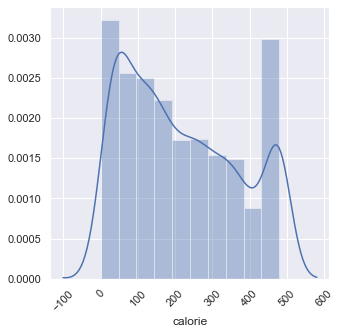

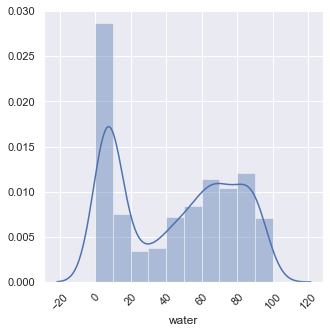

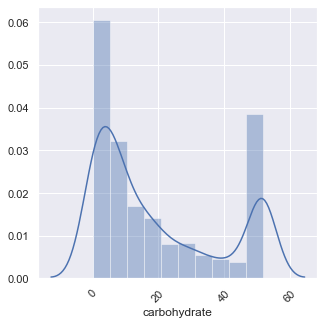

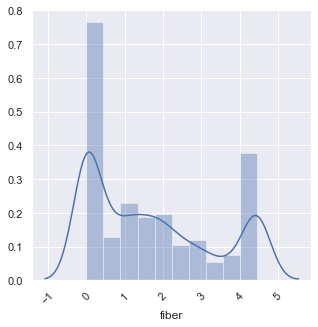

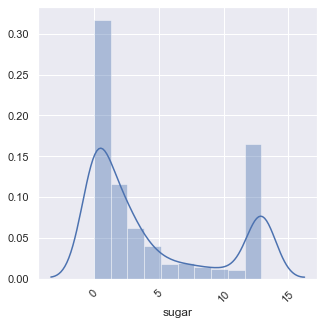

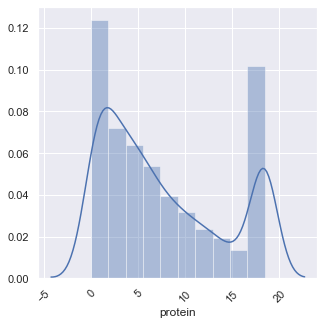

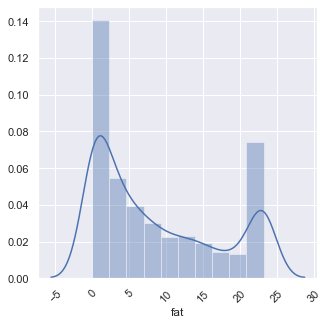

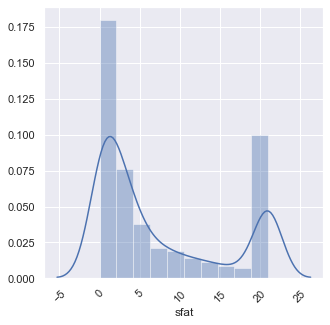

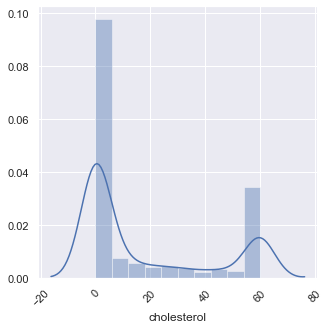

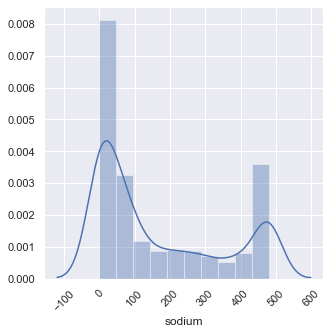

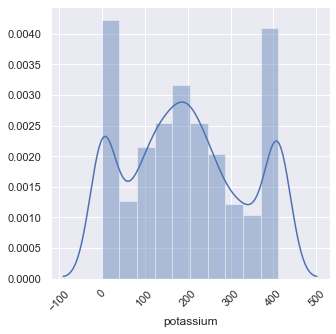

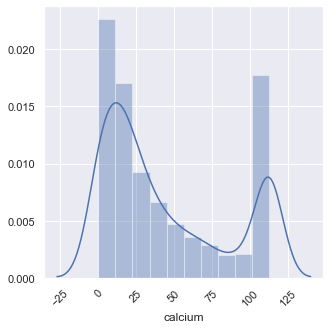

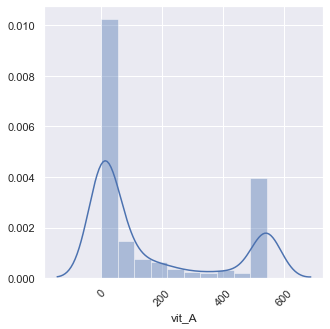

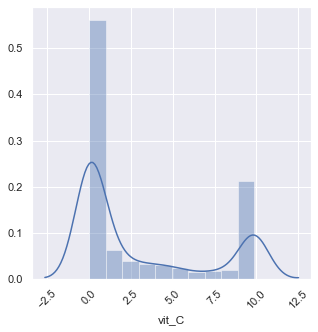

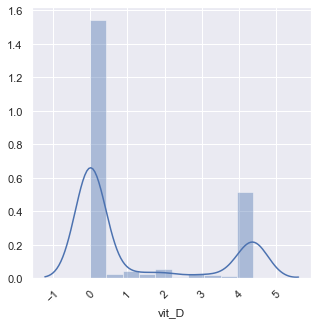

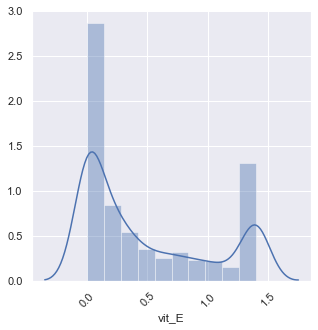

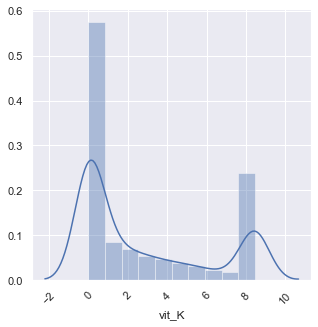

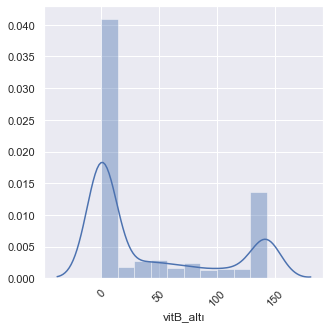

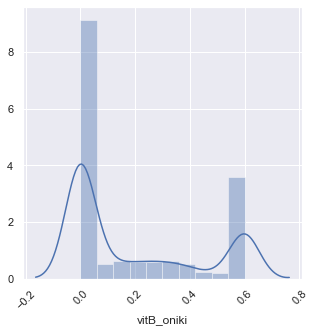

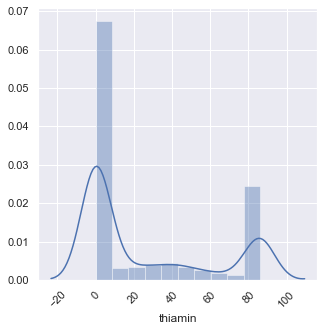

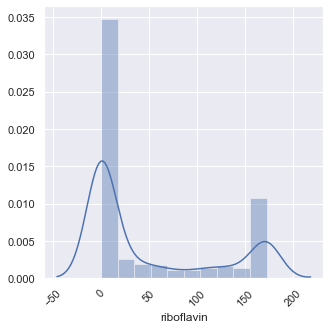

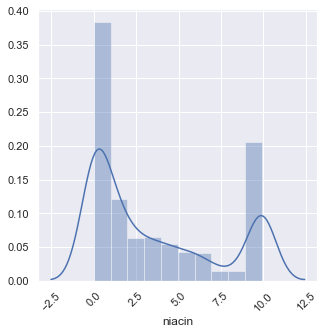

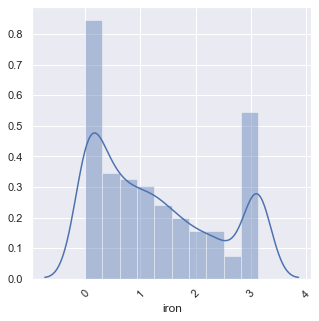

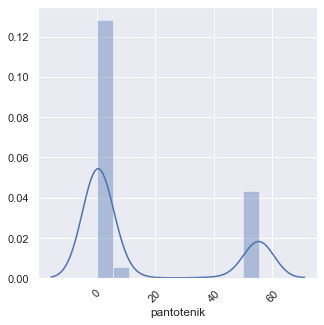

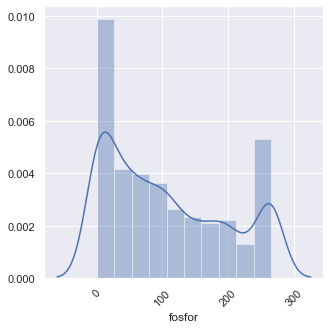

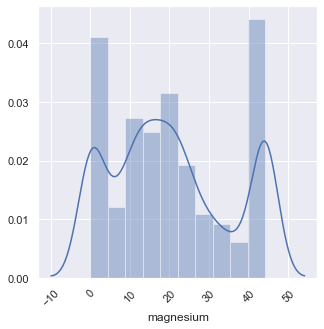

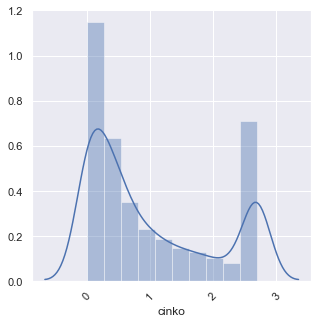

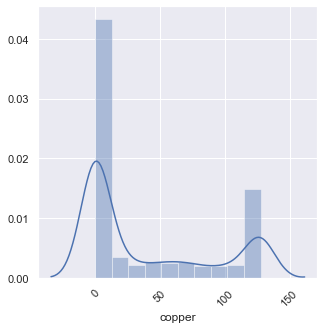

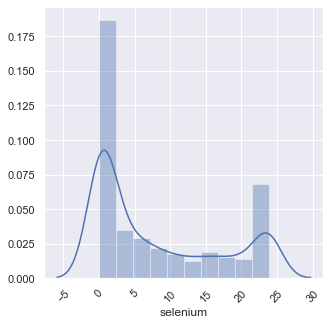

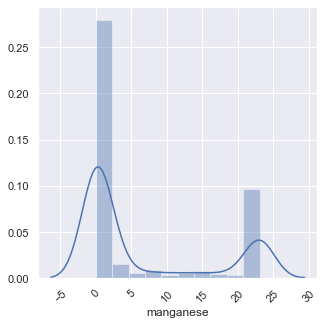

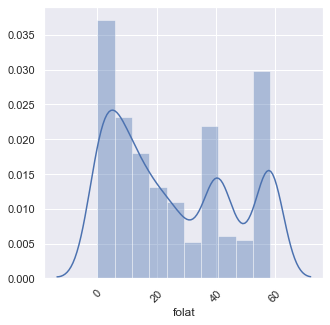

In [440]:
num =data3.loc[:,"calorie":"folat"]
num
for col in fnum:
    plt.figure()
    x=num[col]
    sns.distplot(x, bins=10)
    plt.xticks(rotation=45)
    plt.show()
    print(" ")

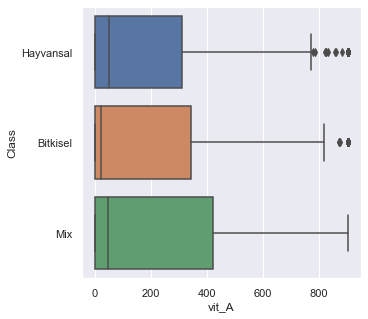

In [302]:
ax = sns.boxplot(x="vit_A", y="Class", data=data3)


* Outlierlarıatmadan çizdirdiğim "vit_A" box-plot ile üstte çizdirdiğim grafiği karşılaştırıldığında,bu hali anlamlı anlamlı oldu.

#### Buraya kadar yaptığımız dönüşümlerin anlamlılığına bakalım
* Birim dönüşümleri yapalım.Tüm değişkenler gram cinsinden yazalım.

In [737]:
data5 = data3.copy()
gram_colunms=['water','carbohydrate','fiber','sugar',
             'protein','fat','sfat']
miligram_colunms=['cholesterol','sodium','potassium',
                 'calcium','vit_C','vit_E','vitB_altı',
                  'iron','pantotenik','fosfor','magnesium',
                 'cinko','copper','manganese']

mikrogram_colunms=['selenium','vit_K','vitB_oniki','folat',
                   'thiamin','riboflavin','niacin']
IU_colunms = ['vit_A','vit_D']
colunms=gram_colunms+miligram_colunms+mikrogram_colunms+IU_colunms
#1000000 mikrogram 1 gram
#1000 miligram 1 gram
#1 gram 3*10**(-5) UI
##tüm kolonlar gram cinsinden yazacağız.
##"calorie"değişkeni kcal biriminden olduğu için hesaplamaların içerisine alınmadı.
for col in colunms :
    if col in miligram_colunms:
        for i in range(2500):
            data5.loc[i,col] = data5.loc[i,col]*(10**(-3))
    if col in mikrogram_colunms:
        for i in range(2500):
            data5.loc[i,col]=data5.loc[i,col]*(10**(-6))
    if col in  IU_colunms:
        for i in range(2500):
            data5.loc[i,col]=data5.loc[i,col]*(30**(-5))
            
            

In [ ]:
besin_toplam_gram={}
t=0
for i in range(2500):
    for col in colunms:
        t=t+data5.loc[i,col]
    besin_toplam_gram[i]=t
    t=0


In [559]:
besin_toplam_gram

{0: 63.261115575248446,
 1: 109.13839228950205,
 2: 108.87408321051693,
 3: 104.67790653727238,
 4: 103.92866453087194,
 5: 95.78452015311807,
 6: 94.904103,
 7: 125.32103123181581,
 8: 81.41559214563729,
 9: 102.23798574606096,
 10: 99.16646746062787,
 11: 68.54109952000002,
 12: 116.96831037721218,
 13: 121.37504031415736,
 14: 111.09990756267284,
 15: 104.68576631645371,
 16: 43.25081785517355,
 17: 42.339639615589505,
 18: 103.68289055932873,
 19: 110.4194010793919,
 20: 107.03574239854399,
 21: 126.08931387592982,
 22: 101.52222154606102,
 23: 105.86052865664404,
 24: 107.34063172606095,
 25: 128.87786614720673,
 26: 116.12644308082308,
 27: 106.99325906415736,
 28: 108.91570454934157,
 29: 124.0089269825,
 30: 101.99361694594909,
 31: 140.74360441851618,
 32: 96.02104751749997,
 33: 30.443998515399937,
 34: 124.77849573852262,
 35: 122.05029031415737,
 36: 122.52149657324998,
 37: 101.8569,
 38: 51.76787559000001,
 39: 97.3333837424177,
 40: 105.74657491287702,
 41: 126.369786253

In [569]:
say = 0
_toplam = 0
for key in besin_toplam_gram:
    say += 1
    _toplam += besin_toplam_gram[key]

print('Besinlerin Ortalama Ağırlığı: ', _toplam/say)

Besinlerin Ortalama Ağırlığı:  95.14951789105727


* Besinlerin  ağırlıkları ve toplam ağırlık ortalamaları gösteriyor ki yaptığımız dönüşümler gerçeğe yakın dönüşümler.

### Düzenlenmiş Verimize Genel Bakalım

In [596]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
def histogram(df,feature):
    #df = input("Enter a DataFrame name: ")
    #col = input("Enter a target column name: ")
    #df=eval(df)
    ncount = len(df)
    ax = sns.countplot(x = feature, data=df ,palette="hls")
    sns.set(font_scale=1)
    ax.set_xlabel('Target sınıfları')
    plt.xticks(rotation=90)
    ax.set_ylabel('Adeti')
    fig = plt.gcf()
    fig.set_size_inches(12,5)
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Sıklık [%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    # Use a LinearLocator to ensure the correct number of ticks
    
    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)
   
    ax2.grid(None)
    plt.title('Target Histogram', fontsize=20, y=1.08)
    plt.show()
    #plt.savefig('col.png')
    del ncount, x, y




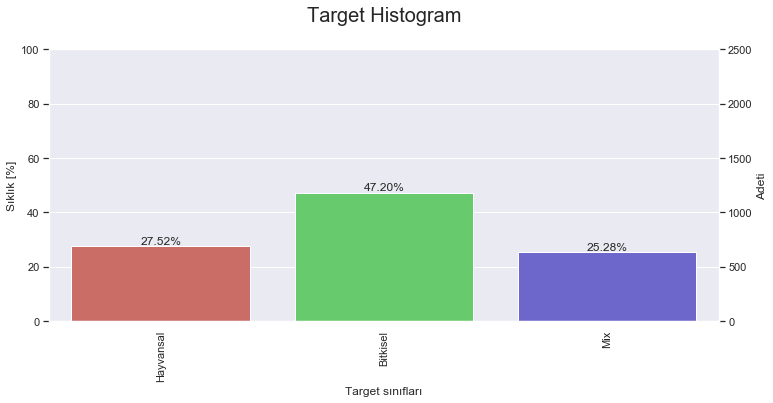

In [598]:
histogram(data5,"Class")

# MODELLER

In [53]:
test_data = pd.read_csv(r'C:/Users/Tuncay/Desktop/kave_hack_2/test2.csv',sep=',')
test_data = test_data[['ID', 'calorie', 'water', 'carbohydrate', 'fiber', 'sugar', 'protein',
       'fat', 'sfat', 'cholesterol', 'sodium', 'potassium', 'calcium', 'vit_A',
       'vit_C', 'vit_D', 'vit_E', 'vit_K', 'vitB_altı', 'vitB_oniki',
       'thiamin', 'riboflavin', 'niacin', 'iron', 'pantotenik',
       'fosfor', 'magnesium', 'cinko', 'copper', 'selenium', 'manganese', 'folat'
       ]]
test_data.head()


,ID,calorie,water,carbohydrate,fiber,sugar,protein,fat,sfat,cholesterol,...,niacin,iron,pantotenik,fosfor,magnesium,cinko,copper,selenium,manganese,folat
0,0,121.85,74.92,2.96,0.82,1.97,16.16,4.74,2.34,49.79,...,0,0.66,0.43,115.55,18.88,0.7,0.03,12.31,0.08,11.34
1,1,376,16.14,72.56,1.54,67.5,81.000.000,878.999.999,0.75,0,...,0,0.32,0,21.00,6.00,0.2,0.2,1.5,0.8,0
2,2,423.74,21.32,48.13,2.57,23.36,4.95,24.69,4.69,7.94,...,0,1.49,0.33,204.14,55.15,1.44,0.32,25.95,0.99,18.61
3,3,198.62,56.4,33.88,0.79,20.85,3.66,5.53,3.34,18.48,...,0,0.23,0.32,71.00,14.17,0.43,0.04,1.1,0.11,13.63
4,4,139,71.37,1.78,0,0,20.38,05.02,1.94,371,...,16.11,7.37,6.13,364.00,19.00,4.66,6.979,824.000.000,184,230


* Datamıza uyguladığımız işlemleri test datasınada uygulayacağız.(Outlier kısmına kadar)

In [54]:
test_data2 = test_data.copy()
big_numbers_tes = {}
for i in test_data2.loc[:,"calorie":"manganese"]:
  for j in range(334):
        if test_data2[i].dtypes == object:
            if  len(test_data2.loc[j,i])>6:
                big_numbers_tes[j,i]=test_data2.loc[j,i].split('.')
                big_numbers_tes[j,i] = ".".join((big_numbers_tes[j,i][0],big_numbers_tes[j,i][1]))
                test_data2.loc[j,i] = float("".join((big_numbers_tes[j,i][0],big_numbers_tes[j,i][1])))
                test_data2.loc[j,i] = (test_data2.loc[j,i])/10
            
            
            
for i in test_data2.loc[:,"calorie":"manganese"]:
    test_data2[i] = pd.to_numeric(test_data2[i], errors='coerce') 
test_data2.loc[147,"water"] =data3["water"].mean()

test_data2.folat = pd.to_numeric(test_data2.folat, errors='coerce') 
Nanlar = isnan(test_data2.folat)
test_data2.folat[Nanlar] = data3["folat"].mean()



C:\Users\Tuncay\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [570]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_wine

In [572]:
X = data5.loc[:,"calorie":"folat"]
Y = data5["Class"]

cgs = KFold(n_splits=5) # 10 katlı çapraz geçerlilik sınaması objesinin yaratılması
agac = DecisionTreeClassifier(criterion = 'entropy') # torbalamada ve AdaBoost'ta kullanılacak karar ağacı objesinin yaratılması

torbalama = BaggingClassifier(base_estimator = agac, 
                              n_estimators = 5) # agac objesinin kullanılarak torbalama modelinin kurulması
torbalama_performans = cross_val_score(torbalama, X, Y, cv = cgs) # yaratılan 10 katlı çapraz geçerlilik sınaması ile torbalama modelinin performansının kaydedilmesi
print('Torbalama performansı:', torbalama_performans.mean())

rastgele_ormanlar = RandomForestClassifier(n_estimators = 5, 
                                           max_features = 3) # her ağaçta maksimum 3 öznitelik kullanılarak 5 farklı ağaç oluşturan rastgele ormanlar objesinin yaratılması
rastgele_ormanlar_performans = cross_val_score(rastgele_ormanlar, X, Y, cv = cgs) # yaratılan 10 katlı çapraz geçerlilik sınaması ile rastgele ormanlar modelinin performansının kaydedilmesi
print('Rastgele ormanlar performansı:', rastgele_ormanlar_performans.mean())

adaboost = AdaBoostClassifier(base_estimator = agac, n_estimators=10) # agac objesini kullanarak maksimüm 1000 döngü ile eğitilecek AdaBoost objesinin yaratılması
adaboost_performans = cross_val_score(adaboost, X, Y, cv = cgs) # yaratılan 10 katlı çapraz geçerlilik sınaması ile AdaBoost modelinin performansının kaydedilmesi
print('Adaboost performansi:', adaboost_performans.mean())

Torbalama performansı: 0.7468
Rastgele ormanlar performansı: 0.7468
Adaboost performansi: 0.752


In [318]:
#xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [66]:
import xgboost as xgb

X_egitim = data3.loc[:,"calorie":"folat"]
y_egitim = data3.loc[:,"Class"]
X_test = test_data2
model=xgb.XGBClassifier(random_state=1,learning_rate=0.09,objective = 'multi:softprob',
    boosting_type = 'gbtree',n_estimators = 200,
    tree_method = 'auto',max_depth=7,
    n_jobs = -1,
    subsample = 0.7 )
model.fit(X_egitim, y_egitim)
print('eğitilen model skore',model.score(X_egitim, y_egitim))

predict_train = model.predict(X_egitim)


prediction=model.predict(X_test)

eğitilen model skore 0.9976


* Model aşırı öğrenme olmuş olabilir ama prediction skoru iyi sonuç verdi.

In [1048]:
test_prediction = pd.DataFrame({'ID': test_data2['ID'], 'Class': prediction})

In [1049]:
test_prediction.to_csv('C:/Users/Tuncay/Desktop/kave_hack_2/prediction.csv', index=False)

### Değerlendirme

* İlk yaptığım dönüşüm, yanlış giriş yapıldığını düşündüğüm verileri dönüşdürmekti.Ardından Outlier verileri IQR testi yaparak temizledim.
* Elde ettiğim veri üzerinden modeller eğittim.Ancak iyi sonuçları alamadım.
* Bunun sebebi yaptığım outlier dönüşümünde veya yanlış girildiği düşündüğüm veri dönüşümünden olabilirdi.
* Bu dönüşümlerden iyi sonuçlar almayınca, NaN içeren datada model oluşturabilen XGBoost algortimasını kullanma kararı aldım.
* XGBoost algoritması diğer modellere göre daha hızlı çalışan ve en iyi sonuç veren algoritmaydı ve prediction'ları kaggle'a yüklediğimde diğer modellere göre en iyi skoru aldım.
